 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [404]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [405]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [406]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [407]:
# Drop nulls
whale_data = whale_df.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [408]:
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [409]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [410]:
# Drop nulls
algo_data = algo_df.dropna()
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [466]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [467]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [468]:
# Fix Data Types


sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [469]:
# Calculate Daily Returns
sp500_return = sp500_df.pct_change()
sp500_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [470]:
# Drop nulls
sp500_return.dropna().head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [471]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return.rename(columns={"Close": "S&P 500 Returns"}, inplace=True)
sp500_return.head()

,S&P 500 Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [499]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_return], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
#combined_df = combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


In [500]:
combined_df = combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

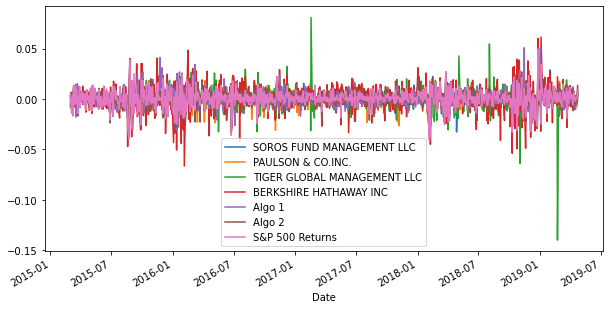

In [501]:
# Plot daily returns of all portfolios
df_combined = pd.concat([whale_df, algo_df, sp500_return], axis = "columns",join = "inner")
df_combined.plot(figsize= (10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

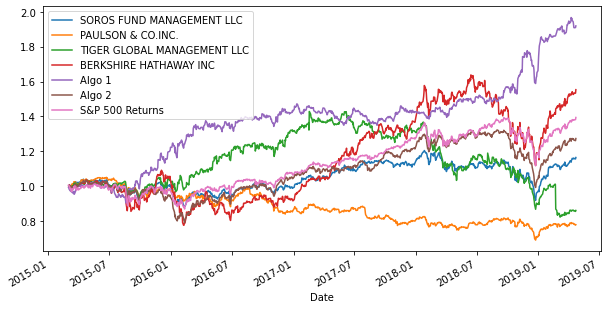

In [502]:
# Calculate cumulative returns of all portfolios
return_data = (1 + df_combined).cumprod() 

# Plot cumulative returns
return_data.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Porfolio Risk'}>

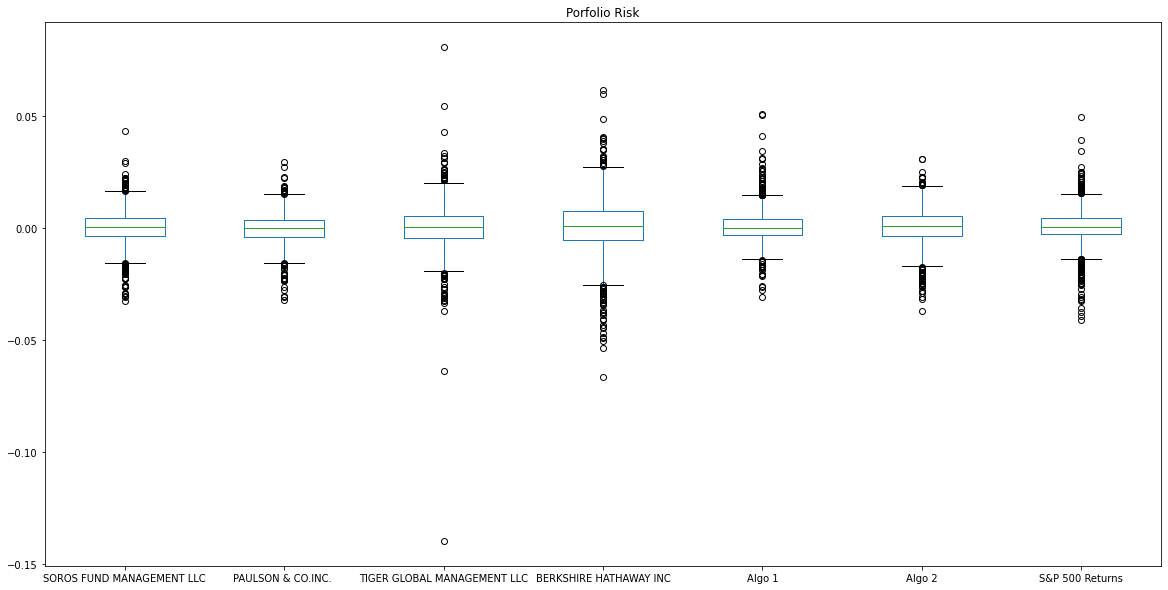

In [503]:
# Box plot to visually show risk
df_combined.plot.box(title= "Porfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [504]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = df_combined.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P 500 Returns                0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [505]:
# Calculate  the daily standard deviation of S&P 500
daily_std
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
Close                          0.008584
Algo 2                         0.008338
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007624
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [506]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
Close                          0.136268
Algo 2                         0.132357
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121026
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

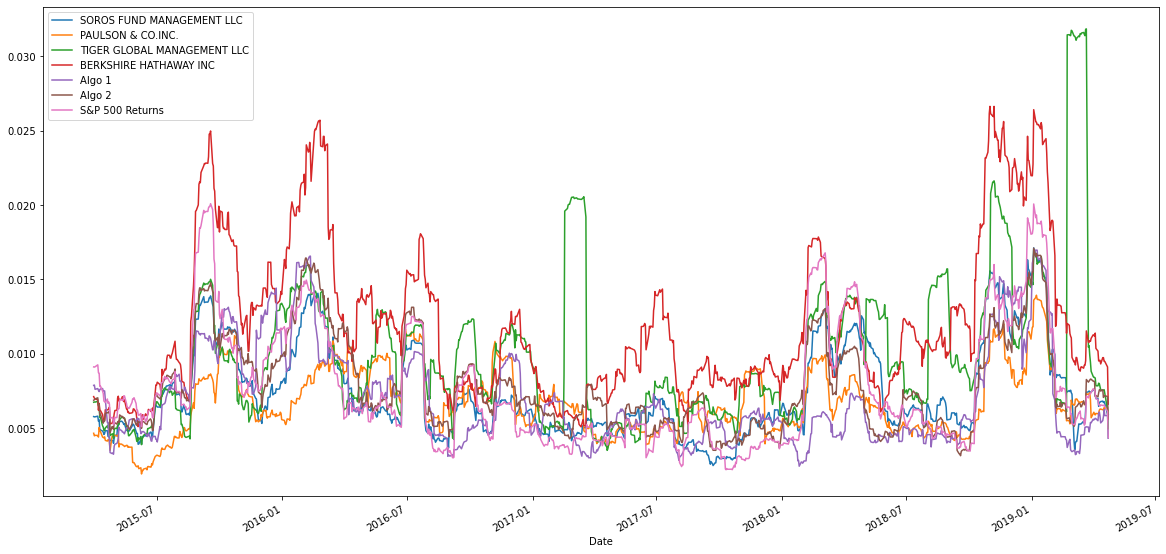

In [507]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [508]:
# Calculate the correlation
daily_correlation = combined_df.corr()
# Display de correlation matrix
daily_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY BETA'}, xlabel='Date'>

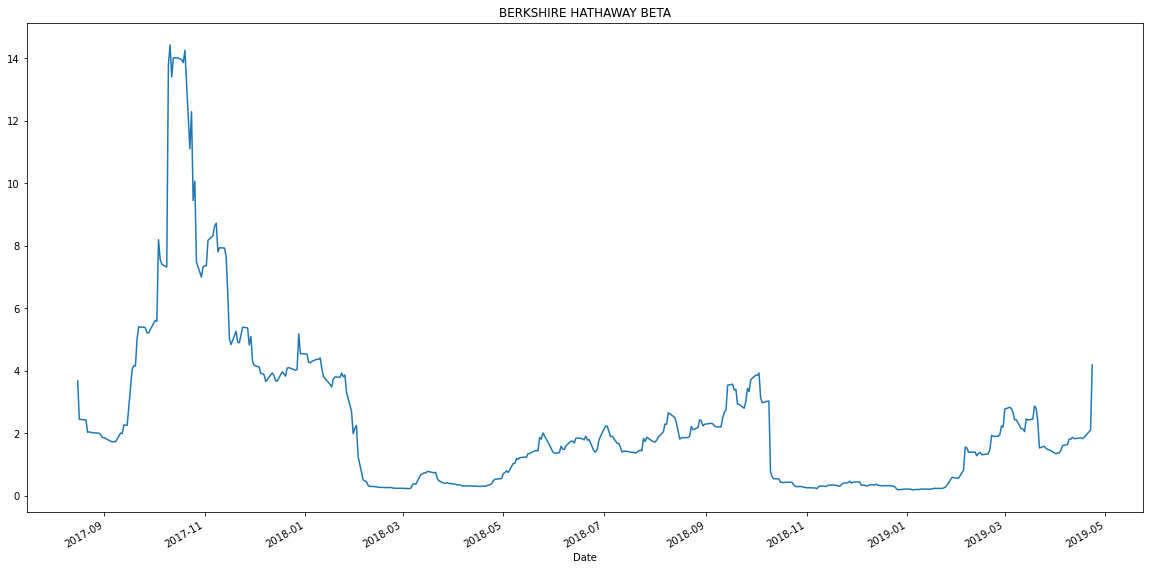

In [509]:
# Calculate covariance of a single portfolio
soros_cov = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=621).cov(combined_df["S&P 500 Returns"])
soros_cov
# Calculate variance of S&P 500
sp500_var = combined_df["S&P 500 Returns"].rolling(window=21).var()
sp500_var
# Computing beta
beta_plot = soros_cov / sp500_var
# Plot beta trend
beta_plot.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY BETA")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

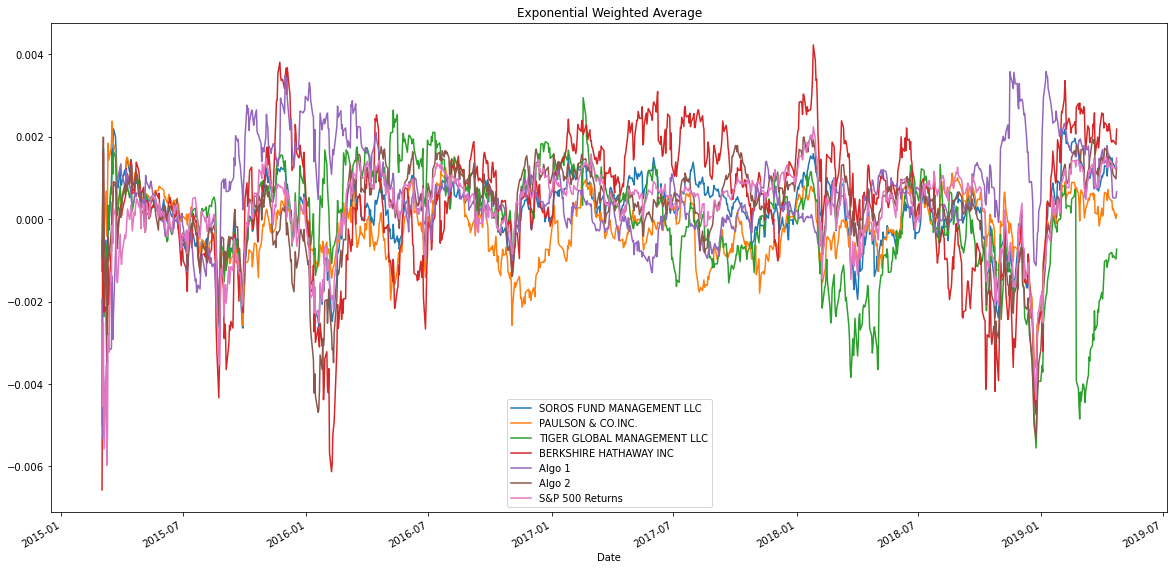

In [510]:
# Use `ewm` to calculate the rolling window
expo_window = combined_df.ewm(halflife=21).mean()
expo_window.plot(figsize=(20,10), title="Exponential Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [511]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Returns                0.648267
dtype: float64

<AxesSubplot:title={'center':'sharpe_ratio'}>

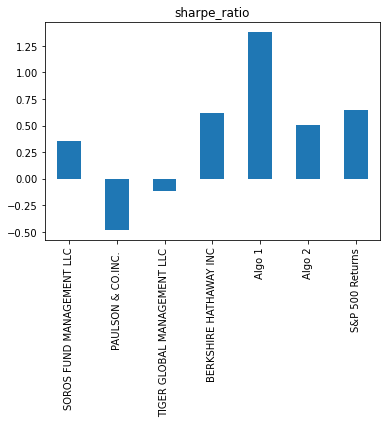

In [512]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "sharpe_ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---The bar plot above shows algo 1 outperforming the S&P500 and the whales porfolios while algo 2 shows that it underperforms.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [513]:
# Reading data from 1st stock
GOOG_data = Path("Resources/GOOG - Sheet1.csv")
GOOG_df = pd.read_csv(GOOG_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GOOG_df


,Close
Date,
2020-01-02 16:00:00,1367.37
2020-01-03 16:00:00,1360.66
2020-01-06 16:00:00,1394.21
2020-01-07 16:00:00,1393.34
2020-01-08 16:00:00,1404.32
...,...
2020-12-24 13:00:00,1738.85
2020-12-28 16:00:00,1776.09
2020-12-29 16:00:00,1758.72


In [514]:
# Reading data from 2nd stock
AAPL_data = Path("Resources/AAPL - Sheet1.csv")
AAPL_df = pd.read_csv(AAPL_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
AAPL_df

,Close
Date,
2020-01-02 16:00:00,75.09
2020-01-03 16:00:00,74.36
2020-01-06 16:00:00,74.95
2020-01-07 16:00:00,74.60
2020-01-08 16:00:00,75.80
...,...
2020-12-24 13:00:00,131.97
2020-12-28 16:00:00,136.69
2020-12-29 16:00:00,134.87


In [515]:
# Reading data from 3rd stock
COST_data = Path("Resources/COST - Sheet1.csv")
COST_df = pd.read_csv(COST_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
COST_df

,Close
Date,
2020-01-02 16:00:00,291.49
2020-01-03 16:00:00,291.73
2020-01-06 16:00:00,291.81
2020-01-07 16:00:00,291.35
2020-01-08 16:00:00,294.69
...,...
2020-12-24 13:00:00,364.58
2020-12-28 16:00:00,371.06
2020-12-29 16:00:00,372.72


In [632]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([GOOG_df, AAPL_df, COST_df], axis="columns", join="inner")
combined_data.index.rename("Date", inplace=True)
#combined_data.sort_index(inplace=True)
combined_data.columns = ["GOOG", "AAPL", "COST"]
combined_data

,GOOG,AAPL,COST
Date,,,
2020-01-02 16:00:00,1367.37,75.09,291.49
2020-01-03 16:00:00,1360.66,74.36,291.73
2020-01-06 16:00:00,1394.21,74.95,291.81
2020-01-07 16:00:00,1393.34,74.60,291.35
2020-01-08 16:00:00,1404.32,75.80,294.69
...,...,...,...
2020-12-24 13:00:00,1738.85,131.97,364.58
2020-12-28 16:00:00,1776.09,136.69,371.06
2020-12-29 16:00:00,1758.72,134.87,372.72


In [633]:
# Reset Date index
combined_data = combined_data.sort_index(ascending=True)
combined_data

,GOOG,AAPL,COST
Date,,,
2020-01-02 16:00:00,1367.37,75.09,291.49
2020-01-03 16:00:00,1360.66,74.36,291.73
2020-01-06 16:00:00,1394.21,74.95,291.81
2020-01-07 16:00:00,1393.34,74.60,291.35
2020-01-08 16:00:00,1404.32,75.80,294.69
...,...,...,...
2020-12-24 13:00:00,1738.85,131.97,364.58
2020-12-28 16:00:00,1776.09,136.69,371.06
2020-12-29 16:00:00,1758.72,134.87,372.72


In [634]:
# Reorganize portfolio data by having a column per symbol
combined_data.head()

,GOOG,AAPL,COST
Date,,,
2020-01-02 16:00:00,1367.37,75.09,291.49
2020-01-03 16:00:00,1360.66,74.36,291.73
2020-01-06 16:00:00,1394.21,74.95,291.81
2020-01-07 16:00:00,1393.34,74.60,291.35
2020-01-08 16:00:00,1404.32,75.80,294.69


In [635]:
# Calculate daily returns
daily_ret = combined_data.pct_change()
# Drop NAs
daily_ret.dropna(inplace = True)

# Display sample data
daily_ret.head()

,GOOG,AAPL,COST
Date,,,
2020-01-03 16:00:00,-0.004907,-0.009722,0.000823
2020-01-06 16:00:00,0.024657,0.007934,0.000274
2020-01-07 16:00:00,-0.000624,-0.004670,-0.001576
2020-01-08 16:00:00,0.007880,0.016086,0.011464
2020-01-09 16:00:00,0.011044,0.021240,0.016051


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [588]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_ret.dot(weights)

portfolio_return.head()

Date
2020-01-03 16:00:00   -0.004602
2020-01-06 16:00:00    0.010955
2020-01-07 16:00:00   -0.002290
2020-01-08 16:00:00    0.011810
2020-01-09 16:00:00    0.016112
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [629]:
# Join your returns DataFrame to the original returns DataFrame
       
all_return = pd.concat([portfolio_return, combined_df], axis="columns", join="outer")
#all_return.sort_index(inplace=True)
all_return.rename(columns = {0:"New_Portfolio"}, inplace=True)
all_return

,New_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,,
2015-03-03 00:00:00,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04 00:00:00,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05 00:00:00,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06 00:00:00,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09 00:00:00,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
2020-12-24 13:00:00,0.006293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28 16:00:00,0.024985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29 16:00:00,-0.006207,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [621]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_return.isnull().sum()


New_Portfolio                  1043
SOROS FUND MANAGEMENT LLC       252
PAULSON & CO.INC.               252
TIGER GLOBAL MANAGEMENT LLC     252
BERKSHIRE HATHAWAY INC          252
Algo 1                          252
Algo 2                          252
S&P 500 Returns                 252
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [622]:
# Calculate the annualized `std`
annual_std = all_return.std() * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500 Returns                0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
New_Portfolio                  0.340862
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

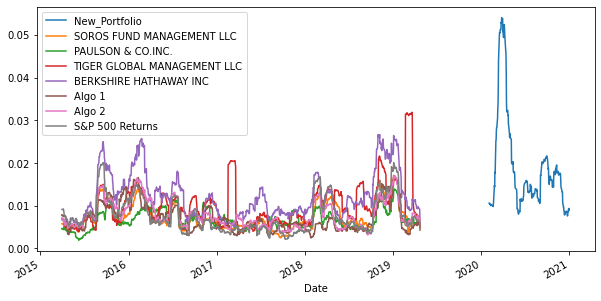

In [623]:
# Calculate rolling standard deviation
rolling_std = annual_std.rolling(window=21).cov()
# Plot rolling standard deviation
all_return.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

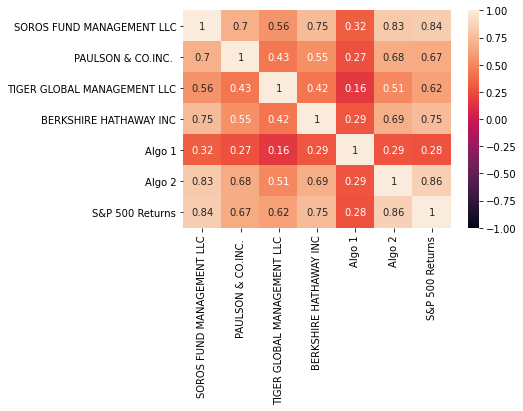

In [624]:
# Calculate and plot the correlation
correlation = combined_df.corr()
import seaborn as sns
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Portfolio Beta'}, xlabel='Date'>

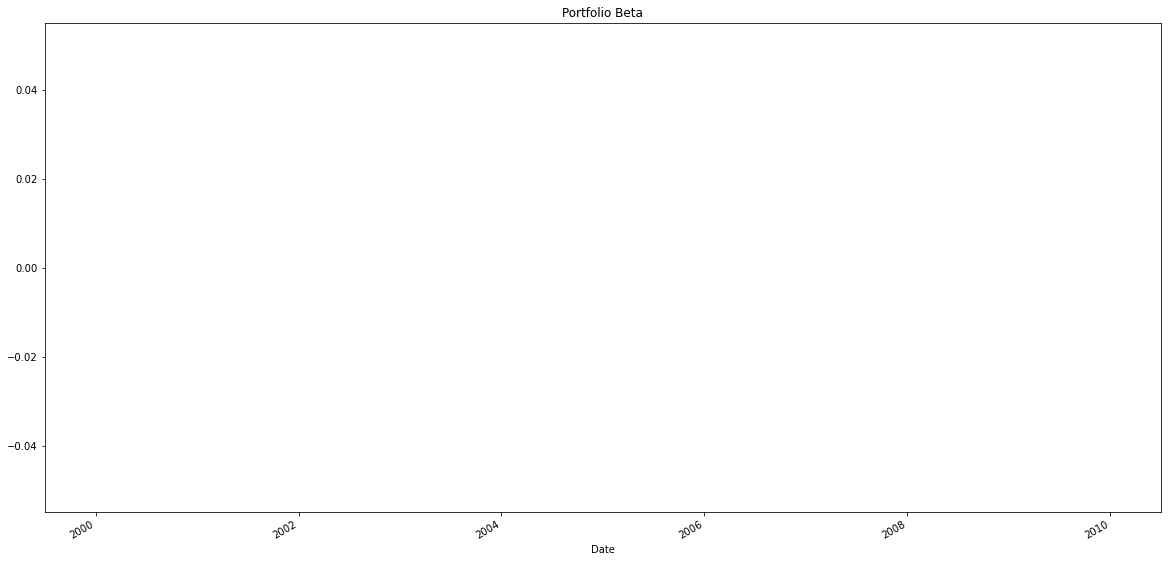

In [628]:
# Calculate and plot Beta
cov2 = all_return['New_Portfolio'].rolling(window=60).cov(all_return['S&P 500 Returns'])
cov2

var2 = all_return['S&P 500 Returns'].rolling(window=60).var()
var2

beta1 = (cov2 / var2)
beta1

beta1.plot(figsize=(20,10), title="Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [636]:
# Calculate Annualzied Sharpe Ratios
sharp_ratio = (all_return.mean() * 252) / (all_return.std() * np.sqrt(252))

<AxesSubplot:title={'center':'SHARPE RATIO'}>

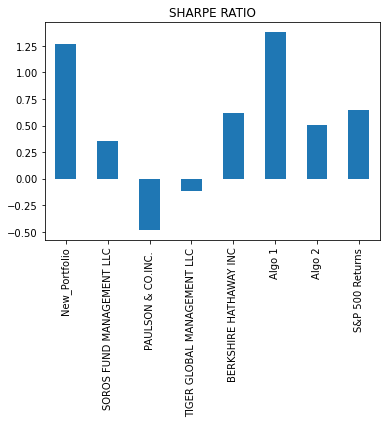

In [637]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind="bar", title="SHARPE RATIO")

### How does your portfolio do?

Write your answer here!

In [ ]:
The bar chart above displaying the Sharpe Ratio shows that My portfolio is out performing all other than Algo 1.